# Prog officiel : Déterminer, à l’aide d’un langage de programmation, le taux d’avancement final d’une transformation, modélisée par la réaction d’un acide sur l’eau.

#### Je ne vois vraiment pas en quoi un langage de programmation va nous aider ici !?!

$\tau = \dfrac{x_f}{x_{max}}$

$K_A = \dfrac{[H_3O^+]_e \times [A^-]_e}{[HA]_e}$

$[HA] = [HA] - \dfrac{x}{V}$

$[H_3O^+] = [A^-] = \dfrac{x}{V}$

$x_{max} = [HA]_i \times V$

#### Je propose (parce qu'il faut bien utiliser un langage de programmation !) de tracer $(K_A \times [HA])$ et $([H_3O^+] \times [A^-])$ en fonction de $x$ et voir quand ils sont égaux pour trouver la valeur de $x_f$, et enfin déduire $\tau$.

In [1]:
import matplotlib.pyplot as plt

###  Exemple avec une solution d'acide éthanoïque c = 1.0e-1 mol/L et V = 10 mL.

In [2]:
Ka = 1.6e-5 # constante d'acidité du couple
C = 1e-1    # concentration apportée en acide
V = 1e-2    # volume en L

calcul de xmax :

In [3]:
xmax = C * V
print(f"xmax = {xmax} mol")

xmax = 0.001 mol


Création d'une série d'avancements de 0 à xmax :

In [4]:
N = 100 # N = nb de valeurs (plus N augmente, plus on sera précis)
liste_x = [i/N*xmax for i in range(0, N+1)]

Calcul de $y1 = Ka \times [HA]$ :

In [5]:
y1 = [Ka*(C-x/V) for x in liste_x]

Calcul de $y2 = [H3O+] \times [H-]$ :

In [6]:
y2 = [x**2 for x in liste_x]

Tracé des graphes :

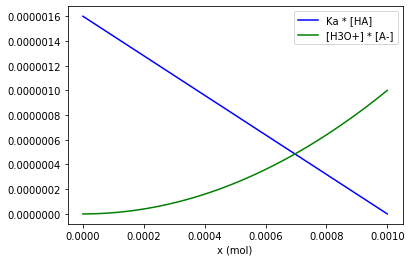

In [7]:
plt.plot(liste_x, y1, color='blue', label="Ka * [HA]")
plt.plot(liste_x, y2, color='green', label="[H3O+] * [A-]")
plt.xlabel('x (mol)')
plt.legend()
plt.show()

#### Deuxième façon de procéder (sans tracer le graphique) : on calcule pour chaque x l'écart entre y1 et y2, et on retient le x qui donne le minimum.

In [8]:
xf = 0
ecart_mini = 1 # valeur forcément trop grande
for x in liste_x:
    ecart = abs(Ka*(C-x/V) - x**2)
    if ecart < ecart_mini:
        ecart_mini = ecart
        xf = x
        
print(f"xf = {xf} mol")
print(f"xmax = {xmax} mol")
print(f"tau = {xf/xmax*100} %")

xf = 0.0007 mol
xmax = 0.001 mol
tau = 70.0 %


### Après avoir vu le principe, on peut automatiser pour trouver le taux d'avancement final en fonction de la concentration apportée en acide.

In [9]:
def tau(C, Ka, V=1e-2, N=100):
    """ Renvoie le taux d'avancement final pour la réaction d'un acide dans l'eau
    en fonction de sa concentration C.
    La constante d'acidité du couple vaut Ka.
    Le volume V vaut 10 mL par défaut .
    Remarque : en changeant N, on peut augmenter la précision de la réponse """
    xmax = C * V
    liste_x = [i/N*xmax for i in range(0, N+1)]
    xf = 0
    ecart_mini = 1
    for x in liste_x:
        ecart = abs(Ka*(C-x/V) - x**2)
        if ecart < ecart_mini:
            ecart_mini = ecart
            xf = x
    return xf/xmax*100

In [10]:
for i in range(5):
    c = 10**(-i)
    print(f"c = {c} mol/L".ljust(20) + f"tau = {tau(c, 1.6e-5,N=1000):1.2f} %".rjust(20))

c = 1 mol/L                tau = 32.80 %
c = 0.1 mol/L              tau = 69.70 %
c = 0.01 mol/L             tau = 94.40 %
c = 0.001 mol/L            tau = 99.40 %
c = 0.0001 mol/L           tau = 99.90 %


#### On constate que plus un acide faible est dilué (faible concentration), plus le taux d'avancement final augmente !